In [1]:
# Swan notebook example that fetches data for one PM XPOC event and tries to grab the Raw data dumps for this specific event from NXCALS

import datetime
import json

import pandas as pd
import requests
% matplotlib inline


In [4]:
# Fetches one XPOC event from the PM REST API
# For documentation on the API open http://pm-api-pro in the browser
response = requests.get(
	"http://pm-api-pro/v2/pmevent/within/duration?system=PME&className=XPOC_B1&source=PM.BE-PM1&fromTimestampInNanos=1527804000000000000&durationInNanos=3600000000000")

# Parses the JSON result from PM API
sourcesList = json.loads(response.text)["content"][0]["pmEventSources"]
print("Found " + str(len(sourcesList)) + " sources to fetch!")

# Get max and min timestamps
startTime = sourcesList[0]["timestamp"]
endTime = startTime

for source in sourcesList:
	if startTime > source["timestamp"]:
		startTime = source["timestamp"]
	if endTime < source["timestamp"]:
		endTime = source["timestamp"]

# Date must be converted to string for the data access API and python datetime does not accept nanos.
format_str = "%Y-%m-%d %H:%M:%S.0"
startTime = datetime.datetime.fromtimestamp(startTime / 1000000000).strftime(format_str)
endTime = datetime.datetime.fromtimestamp(endTime / 1000000000).strftime(format_str)

print("Querying between " + startTime + " and " + endTime)

response = requests.get(
	"http://pm-api-pro/v2/pmdata/signal?system=QPS&className=DQAMCNMB_PMSTD&source=A22R3&timestampInNanos=1528374951890000000&signal=U_QS0")

content = json.loads(response.text)['content'][0]
acqTime = content['namesAndValues'][0]
U_QS0 = content['namesAndValues'][1]

#print("Acquisition Times:" + str(acqTime)) 
#print("Quench Signal:" + str(U_QS0))


Found 252 sources to fetch!
Querying between 2018-06-01 00:14:14.0 and 2018-06-01 00:14:15.0


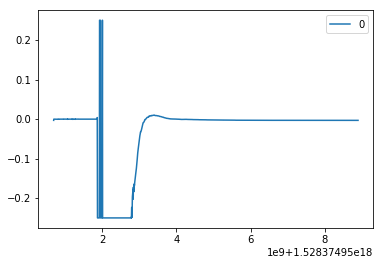

In [3]:
time = acqTime['value']
voltage = U_QS0['value']

df = pd.DataFrame(voltage, time)
df.plot()
